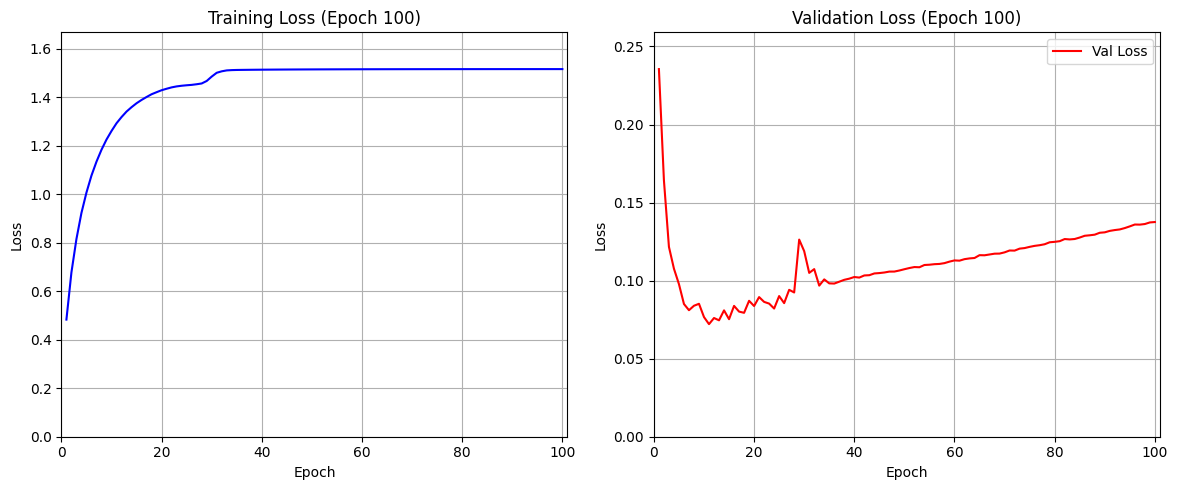

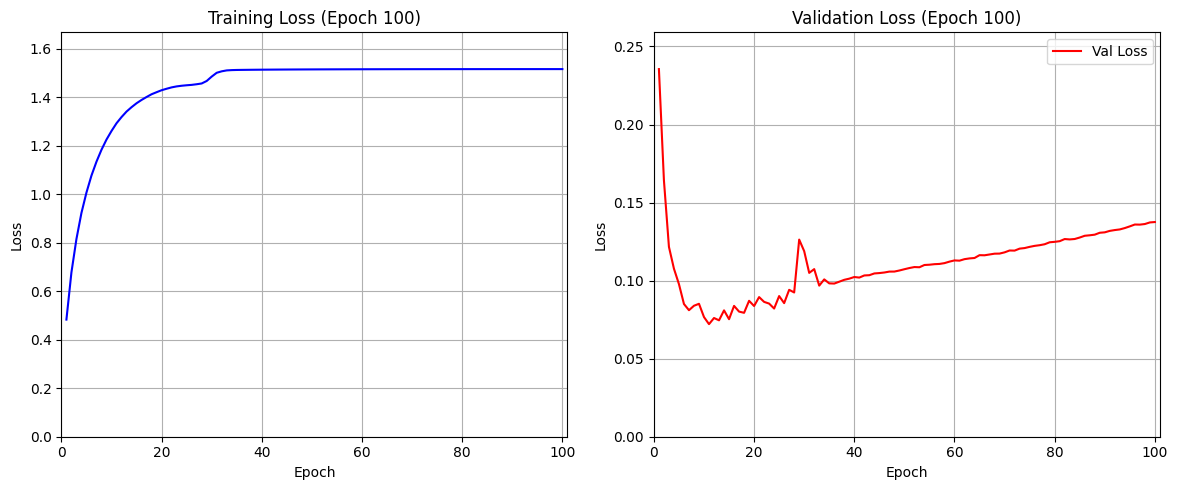

In [1]:
import torch
import torch.nn as nn
from torchvision.datasets import MNIST
from torchvision import transforms
from myocr.modeling.model import ModelZoo
from myocr.training.base import EasyTrain, Trainer
from torch.optim import Adam

model = ModelZoo.load_model("custom", "../modeling/mlp.py", "cuda:0" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])

train_dataset = MNIST(root='/home/robby/data', train=True, download=True, transform=transform)
val_dataset = MNIST(root='/home/robby/data', train=False, download=True, transform=transform)

trainer = Trainer(model,[],nn.CrossEntropyLoss() , optimizer=Adam(model.parameters(), lr=1e-3), num_epochs=100, batch_size = 500)

EasyTrain.fit(trainer, train_dataset, val_dataset)
